In [1]:
from google.colab import files


uploaded = files.upload()


Saving data.csv to data.csv


Enter the total number of clusters: 5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Enter the eps count for db clustering:0.5
Enter the minimum number of samples:5


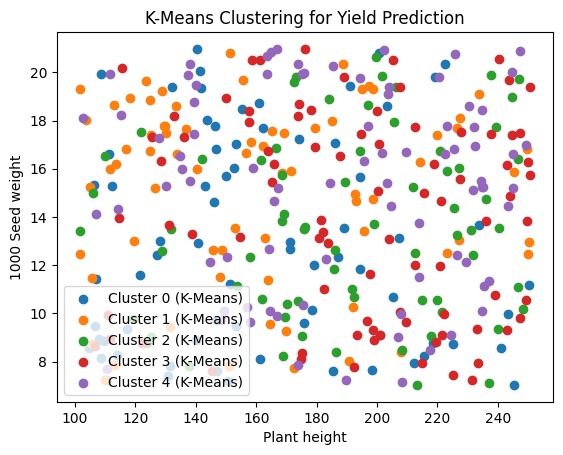

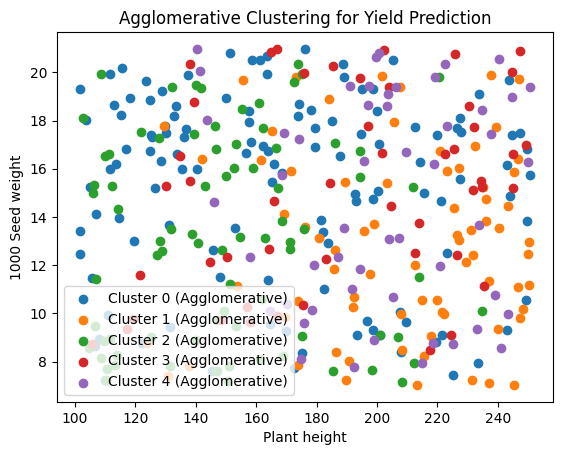

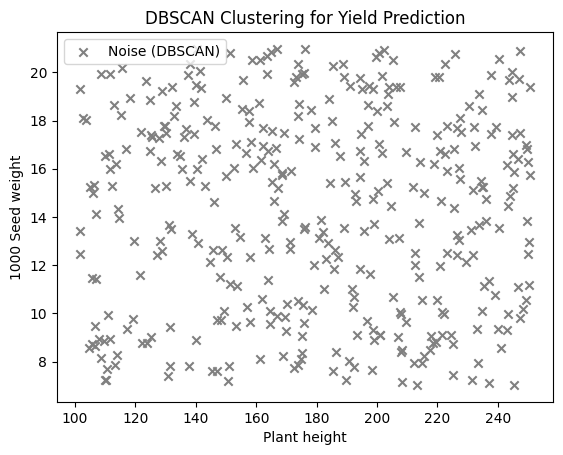

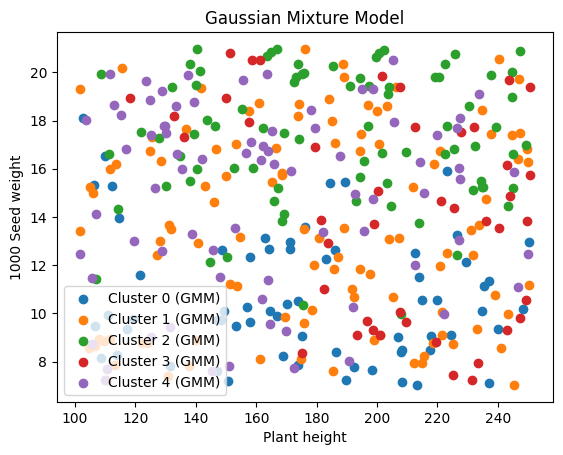

Metrics with Ground truth tables cannot be applied here as this is an unsupervised data...
METRICS WITHOUT GROUND TABLES :
Inertia for K-Means: 1972.1920984887174
Silhouette Score for K-Means: 0.12240676161175151
Inertia for Agglomerative Clustering: 6015.999999999999
Silhouette Score for Agglomerative Clustering: 0.07553864743431002
Silhouette Score for DBSCAN: Not applicable due to noise points
Silhouette Score for Gaussian Mixture Model (GMM): 0.07353163557015238


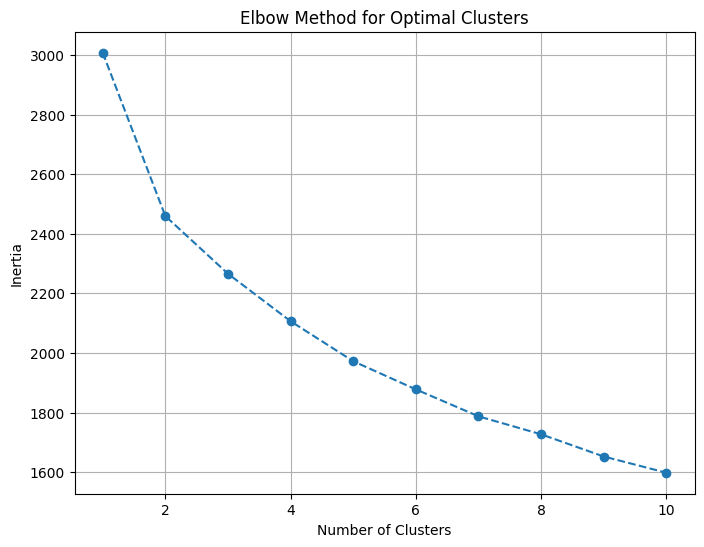

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import ward


data = pd.read_csv('data.csv')

# Considering only the following features are essential for a prominent yield
selected_features = [
    'Days to 50% flowering',
    'Plant height',
    '1000 Seed weight',
    'Spike length',
    'Spike girth',
    'Leaf blade length',
    'Leaf blade width',
    'Spike density '
]

# Drop rows with NaN
data.dropna(subset=selected_features, inplace=True)

# X contains the columns of selected features
X = data[selected_features]


# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.array(X_scaled)




num_clusters = int(input("Enter the total number of clusters: "))

# K-Means Clustering

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(X_scaled)

# ------------------------------------------------------------------
# Agglomerative Clustering
# Here each object is treated as a singleton cluster and then each pair of clusters are successively grouped into a big cluster containing all objects
agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels_agglomerative = agglomerative.fit_predict(X_scaled)

#--------------------------------------------------------------------
# DBSCAN Clustering - clustering based on core points and border points (collected from a bunch of scattered points)
#eps defines the neighbourhood around a data point where if the distance between two points is lower or equal to 'eps' then they are considered neighbours.

eps_val = float(input("Enter the eps count for db clustering:"))
minsamp = int(input("Enter the minimum number of samples:"))
dbscan = DBSCAN(eps=eps_val, min_samples=minsamp)
cluster_labels_dbscan = dbscan.fit_predict(X_scaled)

# -------------------------------------------------------------------
# Gaussian Mixture Model (GMM) Clustering
#GMM is same as k-means except that it includes variance and also it is meant even for non circular clustering unlike k-means

gmm = GaussianMixture(n_components=num_clusters)
cluster_labels_gmm = gmm.fit_predict(X_scaled)

# Add cluster labels to the original dataset
data['Cluster_KMeans'] = cluster_labels_kmeans
data['Cluster_Agglomerative'] = cluster_labels_agglomerative
data['Cluster_DBSCAN'] = cluster_labels_dbscan
data['Cluster_GMM'] = cluster_labels_gmm

#VISUALIZATION
# Visualize the results for K-Means
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster_KMeans'] == cluster]
    plt.scatter(cluster_data['Plant height'], cluster_data['1000 Seed weight'], label=f'Cluster {cluster} (K-Means)')

plt.xlabel('Plant height')
plt.ylabel('1000 Seed weight')
plt.title('K-Means Clustering for Yield Prediction')
plt.legend()
plt.show()

# Visualize the results for Agglomerative Clustering
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster_Agglomerative'] == cluster]
    plt.scatter(cluster_data['Plant height'], cluster_data['1000 Seed weight'], label=f'Cluster {cluster} (Agglomerative)')

plt.xlabel('Plant height')
plt.ylabel('1000 Seed weight')
plt.title('Agglomerative Clustering for Yield Prediction')
plt.legend()
plt.show()

# Visualize the results for DBSCAN Clustering

#separates the data for which the algorithm assigned unique cluster labels
for cluster in np.unique(cluster_labels_dbscan):

    #value -1 indicates noise points (points which do not belong to any cluster)
    if cluster == -1:


         #separate data frame is created for the noise clusters
        noise_data = data[cluster_labels_dbscan == cluster]
        plt.scatter(noise_data['Plant height'], noise_data['1000 Seed weight'], label='Noise (DBSCAN)', marker='x', color='gray')

    # other than noise clusters
    else:
      #data frame for clusters
        cluster_data = data[cluster_labels_dbscan == cluster]
        plt.scatter(cluster_data['Plant height'], cluster_data['1000 Seed weight'], label=f'Cluster {cluster} (DBSCAN)')

plt.xlabel('Plant height')
plt.ylabel('1000 Seed weight')
plt.title('DBSCAN Clustering for Yield Prediction')
plt.legend()
plt.show()


# Visualize the results for Gaussian Mixture Model (GMM) Clustering


for cluster in range(num_clusters):
    cluster_data = data[data['Cluster_GMM'] == cluster]
    plt.scatter(cluster_data['Plant height'], cluster_data['1000 Seed weight'], label=f'Cluster {cluster} (GMM)')

plt.xlabel('Plant height')
plt.ylabel('1000 Seed weight')
plt.title('Gaussian Mixture Model')
plt.legend()
plt.show()

#Metrics without ground truth tables

print("Metrics with Ground truth tables cannot be applied here as this is an unsupervised data...")
print("METRICS WITHOUT GROUND TABLES :")

# Inertia for kmeans
inertia = kmeans.inertia_
print(f"Inertia for K-Means: {inertia}")

# Silhouette Score for k-means
silhouette_avg = silhouette_score(X_scaled, cluster_labels_kmeans)
print(f"Silhouette Score for K-Means: {silhouette_avg}")

#Inertia for Agglomerative
linkage_matrix = ward(X_scaled)
inertia_agglomerative = sum([d**2 for d in linkage_matrix[:, 2]])
print(f"Inertia for Agglomerative Clustering: {inertia_agglomerative}")

# Silhouette Score for Agglomerative Clustering
silhouette_avg_agglomerative = silhouette_score(X_scaled, cluster_labels_agglomerative)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_avg_agglomerative}")

# DBSCAN does not provide Inertia
# Silhouette Score for DBSCAN (only if there are no noise points)

if -1 not in cluster_labels_dbscan:  # Check if there are no noise points
    silhouette_avg_dbscan = silhouette_score(X_scaled, cluster_labels_dbscan)
    print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan}")
else:
    print("Silhouette Score for DBSCAN: Not applicable due to noise points")

# GMM does not provide Inertia
# Silhouette Score for GMM
silhouette_avg_gmm = silhouette_score(X_scaled, cluster_labels_gmm)
print(f"Silhouette Score for Gaussian Mixture Model (GMM): {silhouette_avg_gmm}")


#OPTIMAL CLUSTERS USING ELBOW CURVE ( the sum of the square distance between points in a cluster and the cluster centroid)
# Initialize a list to store inertia values
inertia_values = []

# Try a range of cluster numbers(Here considering only 10 iterations)
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.show()